In [164]:
import pandas as pd, numpy as np, seaborn as sn, matplotlib.pyplot as plt

df = pd.read_csv("dataset/hcc_dataset.csv", na_values='?')
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,NaN,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137.0,15.0,Active,NaN,NaN,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0.0,NaN,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50.0,50.0,Ambulatory,NaN,Mild,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40.0,30.0,Active,NaN,NaN,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100.0,30.0,Active,NaN,NaN,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,Lives


In [165]:
print(df.shape[0])

df.info()


165
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null   

Analisando os histogramas abaixo é possível notar que "Age", "INR", "Hemoglobin", "MCV", "Albumin" e "Iron" parece seguir uma distribuição normal, o que espero que possa nos ajudar a completar os valores faltantes 

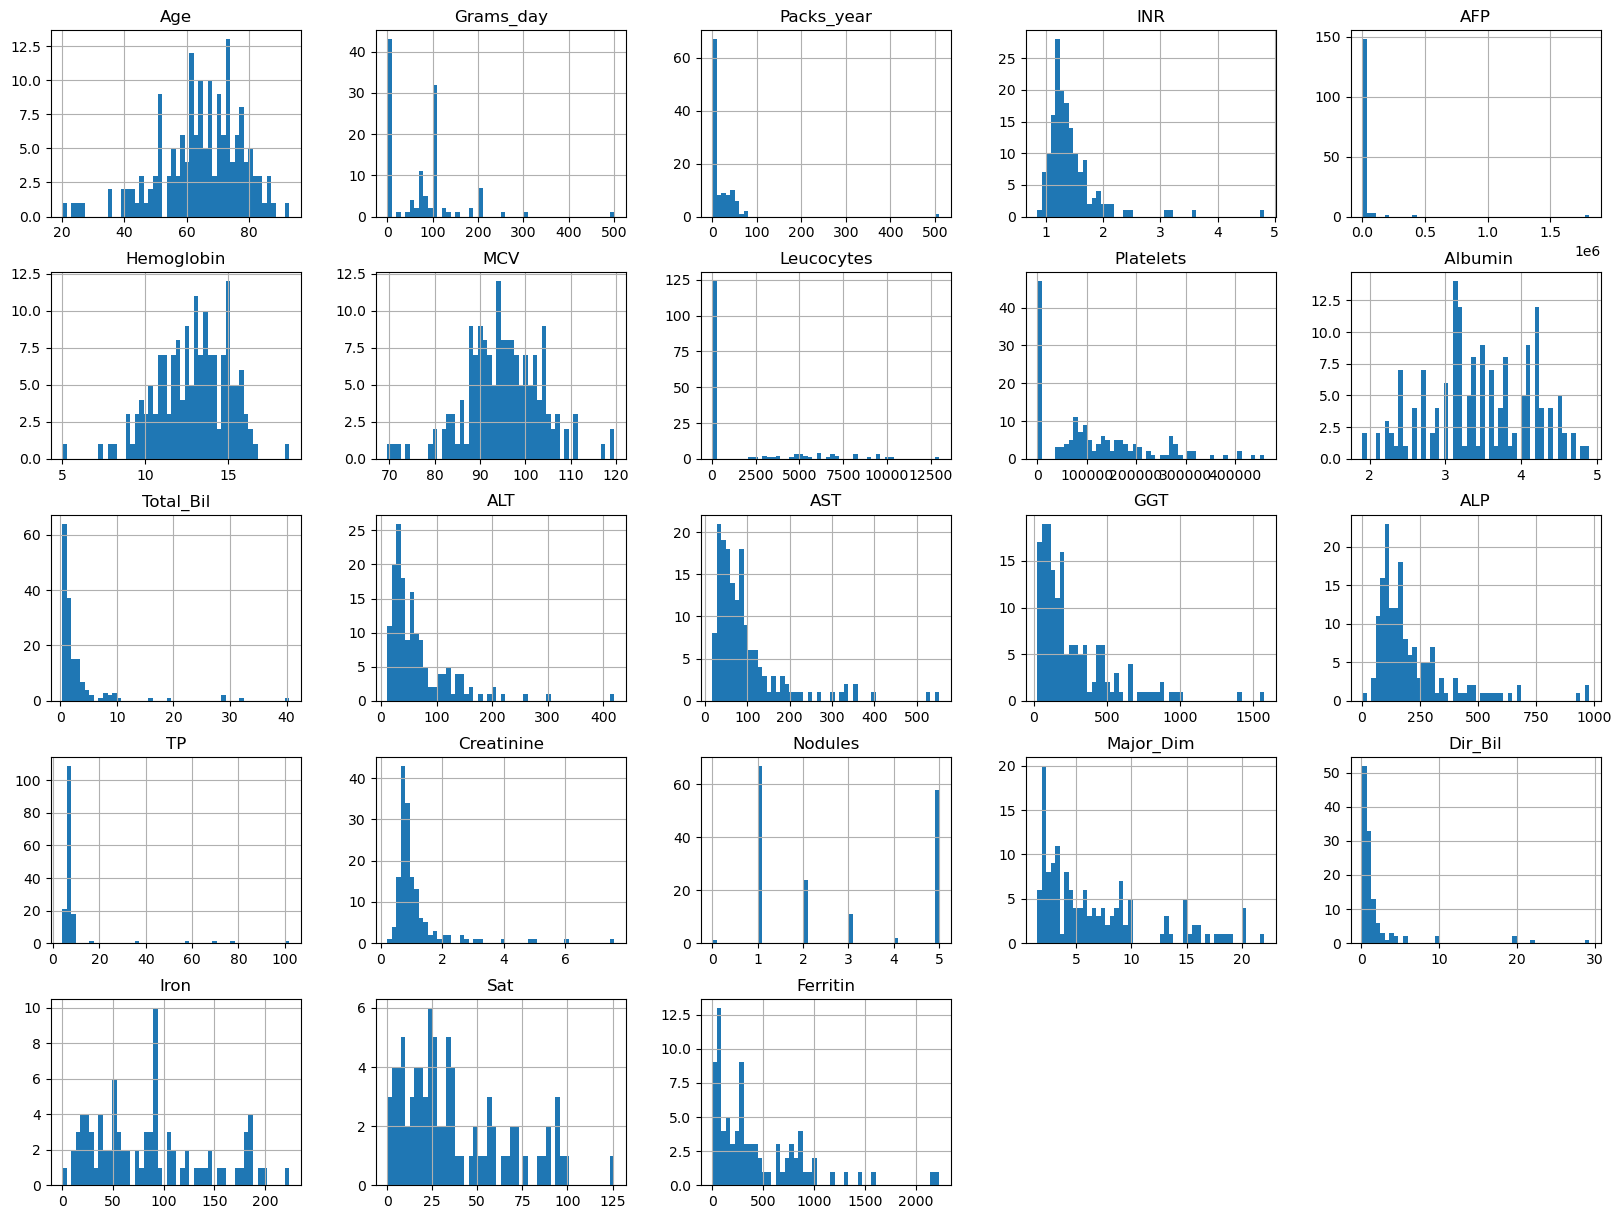

In [166]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Número de colunas com dados faltantes, se pode notar que há muitos dados faltantes em "Encephalopathy" e "Ascites", pelo que não me parecem boas features a se ter em consideração, 
li que features com mais de 80% de valores faltantes, em geral, não são boas features para avaliação, portanto se há por volta de 130 valores faltantes no nosso caso

In [167]:
df.isnull().sum()


Gender              0
Symptoms           18
Alcohol             0
HBsAg              17
HBeAg              39
HBcAb              24
HCVAb               9
Cirrhosis           0
Endemic            39
Smoking            41
Diabetes            3
Obesity            10
Hemochro           23
AHT                 3
CRI                 2
HIV                14
NASH               22
Varices            52
Spleno             15
PHT                11
PVT                 3
Metastasis          4
Hallmark            2
Age                 0
Grams_day          48
Packs_year         53
PS                  0
Encephalopathy    143
Ascites           111
INR                 4
AFP                 8
Hemoglobin          3
MCV                 3
Leucocytes          3
Platelets           3
 Albumin            6
Total_Bil           5
ALT                 4
AST                 3
GGT                 3
ALP                 3
TP                 11
Creatinine          7
Nodules             2
Major_Dim          20
Dir_Bil   

In [168]:
df = df.drop(columns=["Encephalopathy", "Ascites"])

Como a Hemoglobina, MCV, INR, Albumin e Ferro seguem uma distribuição normal substituímos os valores em falta pelo valor médio de cada atributo.

In [169]:
features_normal = ["Hemoglobin", "MCV", "INR", " Albumin", "Iron"]

def fill_median(df:pd.DataFrame, features):
    for feature in features:
        df[feature] = df[feature].fillna(df[feature].median())
fill_median(df, features_normal)
df.isnull().sum()


Gender         0
Symptoms      18
Alcohol        0
HBsAg         17
HBeAg         39
HBcAb         24
HCVAb          9
Cirrhosis      0
Endemic       39
Smoking       41
Diabetes       3
Obesity       10
Hemochro      23
AHT            3
CRI            2
HIV           14
NASH          22
Varices       52
Spleno        15
PHT           11
PVT            3
Metastasis     4
Hallmark       2
Age            0
Grams_day     48
Packs_year    53
PS             0
INR            0
AFP            8
Hemoglobin     0
MCV            0
Leucocytes     3
Platelets      3
 Albumin       0
Total_Bil      5
ALT            4
AST            3
GGT            3
ALP            3
TP            11
Creatinine     7
Nodules        2
Major_Dim     20
Dir_Bil       44
Iron           0
Sat           80
Ferritin      80
Class          0
dtype: int64

In [170]:
df.describe()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
count,165.000000,117.000000,112.000000,165.000000,1.570000e+02,165.000000,165.000000,162.000000,162.000000,165.000000,160.000000,161.000000,162.000000,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,165.000000,85.000000,85.000000
mean,64.690909,71.008547,20.464286,1.418897,1.929995e+04,12.882121,95.116667,1473.961549,113206.442654,3.443879,3.087938,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,84.354545,37.028941,438.997647
std,13.319534,76.277680,51.565130,0.472327,1.490983e+05,2.125649,8.328639,2909.106006,107118.632481,0.672537,5.499379,57.539747,87.484241,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,40.120263,28.993552,457.114454
min,20.000000,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,1.180000,5.200000e+00,11.500000,90.000000,5.100000,255.750000,3.100000,0.800000,31.000000,46.250000,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,78.000000,16.000000,84.000000
50%,66.000000,75.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,50.000000,71.000000,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000
75%,74.000000,100.000000,30.500000,1.530000,6.150000e+02,14.600000,100.300000,19.525000,171500.000000,4.000000,2.925000,78.000000,110.250000,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,85.000000,56.000000,706.000000
max,93.000000,500.000000,510.000000,4.820000,1.810346e+06,18.700000,119.600000,13000.000000,459000.000000,4.900000,40.500000,420.000000,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000


Vou dividir os dados pelo género do paciente.

Número de homens infetados: 133


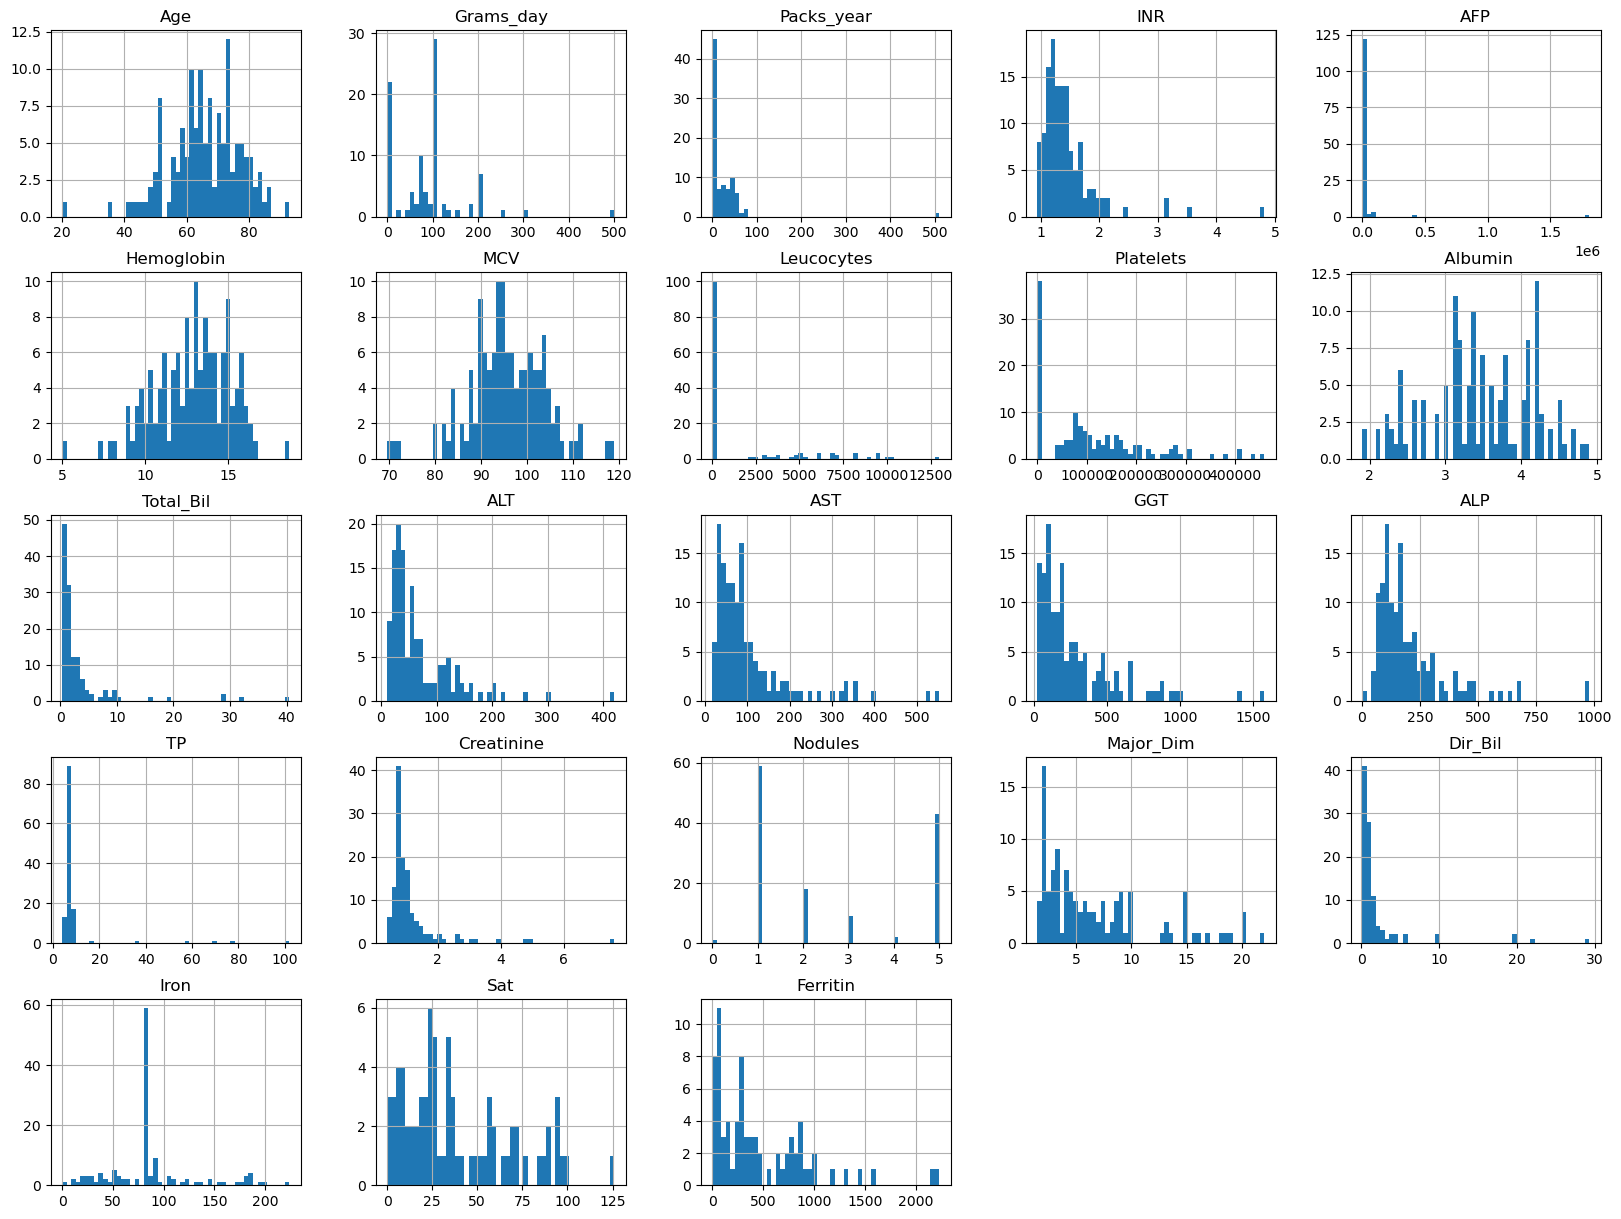

In [171]:
male = df[df['Gender'] == 'Male']
male.hist(bins=50, figsize=(20,15))
#plt.show()
num_male=male.shape[0]
print("Número de homens infetados:",num_male)

Número de mulheres infetadas: 32


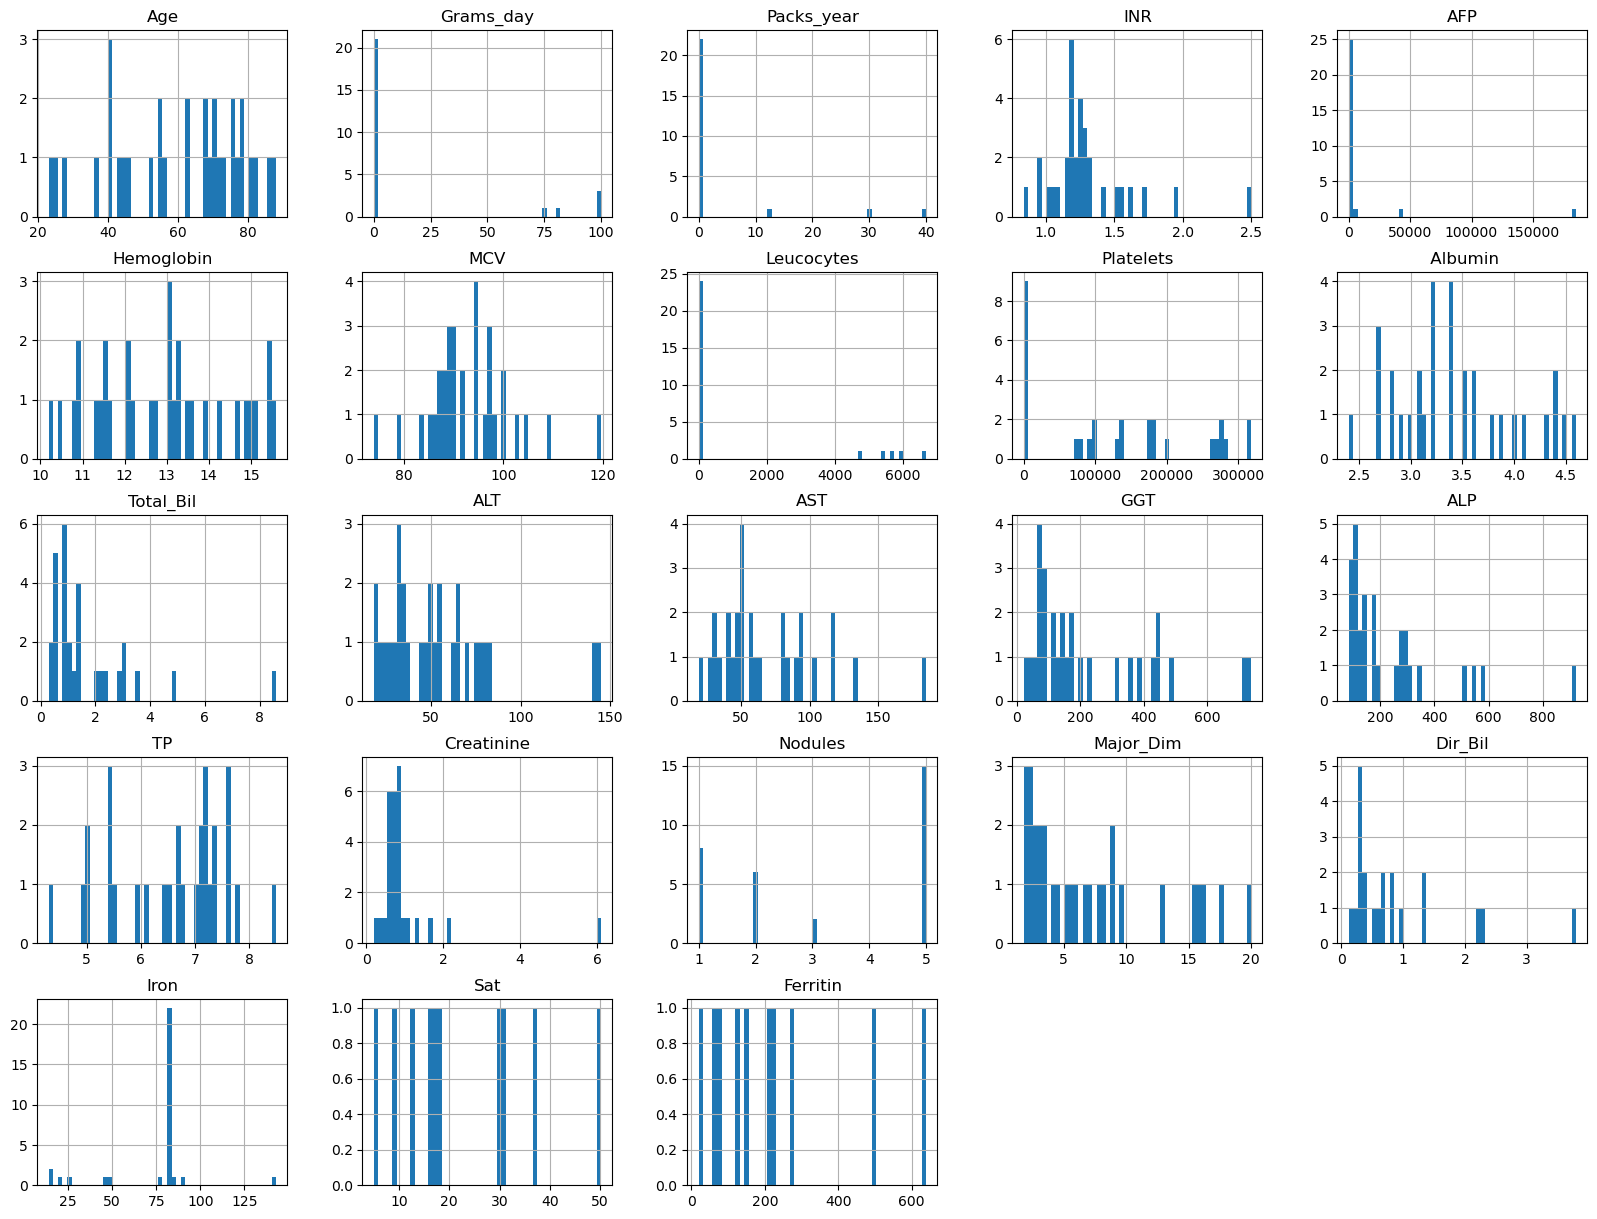

In [172]:
female = df[df['Gender'] == 'Female']
female.hist(bins=50, figsize=(20,15))
#plt.show()
num_female=female.shape[0]
print("Número de mulheres infetadas:",num_female)

Transformar Gender e Class em valores númericos.

In [173]:
df = pd.get_dummies(df, columns=['Gender'], dtype=float)
df = pd.get_dummies(df, columns=['Class'], dtype=float, drop_first=True).rename(columns={"Class_Lives": "Class"})
pd.set_option('display.max_columns', None)
df

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Gender_Female,Gender_Male,Class
0,No,Yes,No,No,No,No,Yes,No,Yes,Yes,NaN,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137.0,15.0,Active,1.53,95.0,13.70,106.60,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,83.0,NaN,NaN,0.0,1.0,1.0
1,NaN,No,No,No,No,Yes,Yes,NaN,NaN,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0.0,NaN,Active,1.30,NaN,13.05,94.95,NaN,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,83.0,NaN,NaN,1.0,0.0,1.0
2,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50.0,50.0,Ambulatory,0.96,5.8,8.90,79.80,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,0.0,1.0,1.0
3,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40.0,30.0,Active,0.95,2440.0,13.40,97.10,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,83.0,NaN,NaN,0.0,1.0,0.0
4,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100.0,30.0,Active,0.94,49.0,14.30,95.10,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,40,NaN,NaN,Active,0.84,NaN,15.40,109.20,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,83.0,NaN,NaN,1.0,0.0,1.0
161,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,No,No,No,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes,68,0.0,0.0,Ambulatory,1.33,4887.0,12.10,88.90,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,83.0,NaN,NaN,1.0,0.0,0.0
162,No,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,NaN,NaN,NaN,NaN,No,No,Yes,65,NaN,48.0,Active,1.13,75.0,13.30,90.00,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,83.0,NaN,NaN,0.0,1.0,1.0
163,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,NaN,NaN,NaN,Yes,Yes,Yes,44,NaN,NaN,Ambulatory,2.14,94964.0,15.60,117.30,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,83.0,NaN,NaN,0.0,1.0,0.0


In [174]:
df = pd.get_dummies(df, columns=df.columns[:22], drop_first=True, dtype=float)
df = pd.get_dummies(df, columns=['PS'], dtype=float)

target = 'Class'
cols = [col for col in df.columns if col != target]
cols.append(target)
df = df.reindex(columns=cols)



df


,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Gender_Female,Gender_Male,Symptoms_Yes,Alcohol_Yes,HBsAg_Yes,HBeAg_Yes,HBcAb_Yes,HCVAb_Yes,Cirrhosis_Yes,Endemic_Yes,Smoking_Yes,Diabetes_Yes,Obesity_Yes,Hemochro_Yes,AHT_Yes,CRI_Yes,HIV_Yes,NASH_Yes,Varices_Yes,Spleno_Yes,PHT_Yes,PVT_Yes,Metastasis_Yes,Hallmark_Yes,PS_Active,PS_Ambulatory,PS_Disabled,PS_Restricted,PS_Selfcare,Class
0,67,137.0,15.0,1.53,95.0,13.70,106.60,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,83.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,62,0.0,NaN,1.30,NaN,13.05,94.95,NaN,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,83.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,78,50.0,50.0,0.96,5.8,8.90,79.80,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,77,40.0,30.0,0.95,2440.0,13.40,97.10,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,83.0,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,76,100.0,30.0,0.94,49.0,14.30,95.10,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,40,NaN,NaN,0.84,NaN,15.40,109.20,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,83.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
161,68,0.0,0.0,1.33,4887.0,12.10,88.90,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,83.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
162,65,NaN,48.0,1.13,75.0,13.30,90.00,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,83.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
163,44,NaN,NaN,2.14,94964.0,15.60,117.30,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,83.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Há muitos mais homens infetados que mulheres mas não existem evidências óbvias que os diversos parâmetros diferem significativamente de mulher para homem.

In [175]:
jovens = df[(df['Age'] >= 20) & (df['Age'] < 40)]
num_jovens=jovens.shape[0]
print("Número de jovens infetados:",num_jovens)
adultos = df[(df['Age'] >= 40) & (df['Age'] < 60)]
num_adultos=adultos.shape[0]
print("Número de adultos infetados:",num_adultos)
idosos = df[(df['Age'] >= 60) & (df['Age'] < 100)]
num_idosos=idosos.shape[0]
print("Número de idosos infetados:",num_idosos)

Número de jovens infetados: 6
Número de adultos infetados: 42
Número de idosos infetados: 117


Análise de outliers tendo em conta a sua definição estatística:

In [176]:
numeric_columns = df.columns[23:]  # Exclude the first 22 non-numeric columns
for column in numeric_columns:
    if df[column].dtype == 'float64':  # Check if the column contains float values
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        counter=0
        # Count outliers directly using boolean indexing
        outliers = (df[column] < lower_limit) | (df[column] > upper_limit)
        num_outliers = outliers.sum()

        print(f"Column: {column}")
        #print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        #print(f"Lower Limit: {lower_limit:.2f}, Upper Limit: {upper_limit:.2f}")
        print(f"Number of outliers: {num_outliers}\n")

        class_distribution = df[column].value_counts()

        print("Class Distribution:")
        print(class_distribution)

        if df[column].nunique() <= 1:
            print("Constant or Near-Constant Feature")

Column: Gender_Female
Number of outliers: 32

Class Distribution:
Gender_Female
0.0    133
1.0     32
Name: count, dtype: int64
Column: Gender_Male
Number of outliers: 32

Class Distribution:
Gender_Male
1.0    133
0.0     32
Name: count, dtype: int64
Column: Symptoms_Yes
Number of outliers: 0

Class Distribution:
Symptoms_Yes
1.0    94
0.0    71
Name: count, dtype: int64
Column: Alcohol_Yes
Number of outliers: 0

Class Distribution:
Alcohol_Yes
1.0    122
0.0     43
Name: count, dtype: int64
Column: HBsAg_Yes
Number of outliers: 16

Class Distribution:
HBsAg_Yes
0.0    149
1.0     16
Name: count, dtype: int64
Column: HBeAg_Yes
Number of outliers: 1

Class Distribution:
HBeAg_Yes
0.0    164
1.0      1
Name: count, dtype: int64
Column: HBcAb_Yes
Number of outliers: 38

Class Distribution:
HBcAb_Yes
0.0    127
1.0     38
Name: count, dtype: int64
Column: HCVAb_Yes
Number of outliers: 34

Class Distribution:
HCVAb_Yes
0.0    131
1.0     34
Name: count, dtype: int64
Column: Cirrhosis_Yes
N

Importante saber quais features possuem valores contínuos e discretos.
Pois podemos utilizar ideias estatisticas para preencher os valores contínuos, enquanto que para os valores discretos utilizamos a moda.

In [177]:
cardinality_limit = 3

# Dicionários para armazenar as features contínuas e discretas
continuous_features = []
categorical_features = []

# Verifica a cardinalidade dos valores únicos em cada coluna
for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values <= cardinality_limit:
        categorical_features.append(column)
    else:
        continuous_features.append(column)

print("Features com valores contínuos:", continuous_features)
print("Features com valores discretos:", categorical_features)

Features com valores contínuos: ['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']
Features com valores discretos: ['Gender_Female', 'Gender_Male', 'Symptoms_Yes', 'Alcohol_Yes', 'HBsAg_Yes', 'HBeAg_Yes', 'HBcAb_Yes', 'HCVAb_Yes', 'Cirrhosis_Yes', 'Endemic_Yes', 'Smoking_Yes', 'Diabetes_Yes', 'Obesity_Yes', 'Hemochro_Yes', 'AHT_Yes', 'CRI_Yes', 'HIV_Yes', 'NASH_Yes', 'Varices_Yes', 'Spleno_Yes', 'PHT_Yes', 'PVT_Yes', 'Metastasis_Yes', 'Hallmark_Yes', 'PS_Active', 'PS_Ambulatory', 'PS_Disabled', 'PS_Restricted', 'PS_Selfcare', 'Class']


Features com valores faltantes se contínuos, preenchidos com a mediana.
Caso categoricos, preenchidos com a moda.

In [178]:
median_values = df[continuous_features].median()
mode_values = df[categorical_features].mode()

df[categorical_features] = df[categorical_features].fillna(mode_values)
df[continuous_features] = df[continuous_features].fillna(median_values)
df.isnull().sum()


Age               0
Grams_day         0
Packs_year        0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
 Albumin          0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodules           0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin          0
Gender_Female     0
Gender_Male       0
Symptoms_Yes      0
Alcohol_Yes       0
HBsAg_Yes         0
HBeAg_Yes         0
HBcAb_Yes         0
HCVAb_Yes         0
Cirrhosis_Yes     0
Endemic_Yes       0
Smoking_Yes       0
Diabetes_Yes      0
Obesity_Yes       0
Hemochro_Yes      0
AHT_Yes           0
CRI_Yes           0
HIV_Yes           0
NASH_Yes          0
Varices_Yes       0
Spleno_Yes        0
PHT_Yes           0
PVT_Yes           0
Metastasis_Yes    0
Hallmark_Yes      0
PS_Active         0
PS_Ambulatory     0
PS_Disabled       0


Criação de um primeiro modelo preditivo:~
RandomForestClassifier

In [179]:
#################################################################################
# BUILD A SIMPLE PREDICTIVE MODEL
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#################################################################################

In [180]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escolha do modelo e treinamento
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)


Acurácia do modelo: 0.74


In [181]:
# test the proportion of each origina class in the datasets
y_train.value_counts() / len(y_train) * 100
y_test.value_counts() / len(y_test) * 100

Class
1.0    56.0
0.0    44.0
Name: count, dtype: float64

Abaixo temos um modelo pelo que possuem 8 Falsos negativos (canto superior direito), o que torna um péssimo modelo para o nosso problema pois queremos evitar a todo custo, pessoas infectadas, recebam a uma falsa notícia.

Matriz de Confusão:


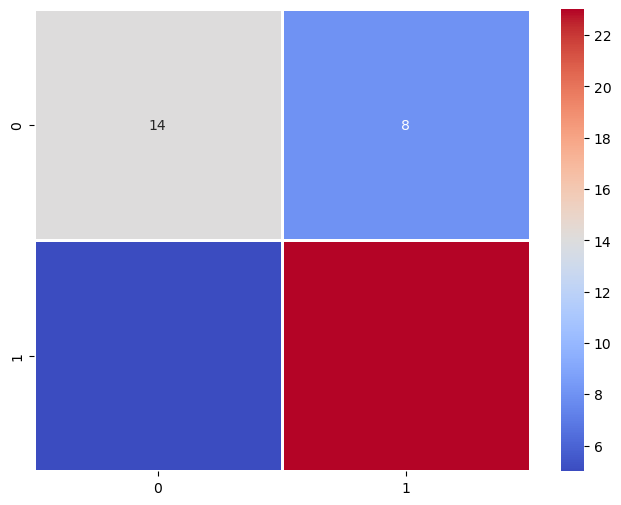

In [183]:
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")

# Plotar o heatmap
plt.figure(figsize=(8, 6))
# Criando o heatmap
sn.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()


# Exibir a matriz de confusão


In [184]:
# Printando as métricas de precision, recall e f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.64      0.68        22
         1.0       0.74      0.82      0.78        28

    accuracy                           0.74        50
   macro avg       0.74      0.73      0.73        50
weighted avg       0.74      0.74      0.74        50

